Primeras filas del archivo:
   adult    budget                                             genres     id  \
0  False  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862   
1  False  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   8844   
2  False         0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  15602   
3  False  16000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  31357   
4  False         0                     [{'id': 35, 'name': 'Comedy'}]  11862   

  original_language               original_title  popularity  \
0                en                    Toy Story   21.946943   
1                en                      Jumanji   17.015539   
2                en             Grumpier Old Men   11.712900   
3                en            Waiting to Exhale    3.859495   
4                en  Father of the Bride Part II    8.387519   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3

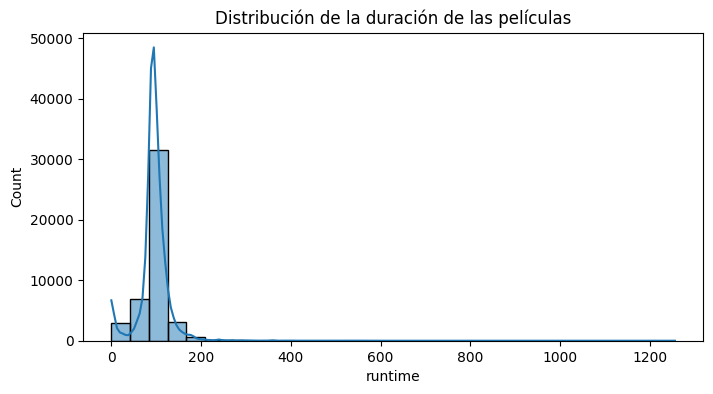

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carga de datos
movies = pd.read_csv('data/movies_dataset.csv' ,encoding='latin1')

# 2. Exploración de datos
print("Primeras filas del archivo:")
print(movies.head())
print("\nInformación del archivo:")
print(movies.info())
print("\nEstadísticas descriptivas:")
print(movies.describe())

# 3. Limpieza de datos
# Eliminar duplicados
movies.drop_duplicates(subset=['id'], inplace=True)

# Eliminar columnas irrelevantes para el modelo de recomendación
irrelevant_cols = ['video', 'status', 'spoken_languages', 'production_countries']
movies.drop(columns=irrelevant_cols, inplace=True)

# Convertir release_date a formato datetime
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')

# Rellenar valores nulos en numéricos con la mediana
numerical_cols = ['popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']
movies[numerical_cols] = movies[numerical_cols].fillna(movies[numerical_cols].median())

# 4. Análisis descriptivo
print("\nPelículas con mayor popularidad:")
print(movies[['title', 'popularity']].sort_values(by='popularity', ascending=False).head())

print("\nDistribución de la duración de las películas:")
plt.figure(figsize=(8, 4))
sns.histplot(movies['runtime'], bins=30, kde=True)
plt.title('Distribución de la duración de las películas')
plt.show()

   adult    budget                                             genres     id  \
0  False  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862   
1  False  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   8844   
2  False         0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  15602   
3  False  16000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  31357   
4  False         0                     [{'id': 35, 'name': 'Comedy'}]  11862   

  original_language               original_title  popularity  \
0                en                    Toy Story   21.946943   
1                en                      Jumanji   17.015539   
2                en             Grumpier Old Men   11.712900   
3                en            Waiting to Exhale    3.859495   
4                en  Father of the Bride Part II    8.387519   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar 

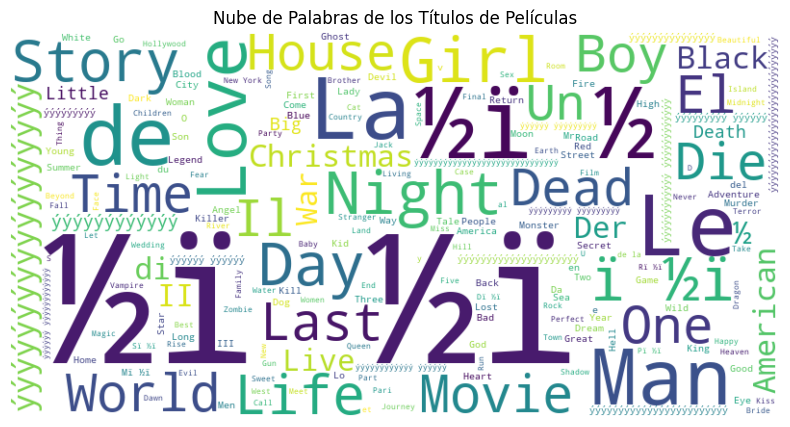

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el archivo CSV
movies = pd.read_csv('data/movies_dataset.csv' ,encoding='latin1')
print(movies.head())

# Combinar todos los títulos en un solo texto
text = ' '.join(title for title in movies['original_title'].astype(str))

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras de los Títulos de Películas")
plt.show()



In [6]:
import pandas as pd
import ast

# Cargar el CSV
movies = pd.read_csv('data/movies_dataset.csv', encoding='latin1')

# Convertir la columna de texto a lista de diccionarios
movies['genres'] = movies['genres'].fillna('[]').apply(ast.literal_eval)

# Extraer solo los nombres de los géneros como texto separado por comas
movies['genres_str'] = movies['genres'].apply(lambda x: ', '.join([d['name'] for d in x]) if isinstance(x, list) else '')

print(movies[['genres', 'genres_str']].head())  # Verificar la transformación


                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                   genres_str  
0   Animation, Comedy, Family  
1  Adventure, Fantasy, Family  
2             Romance, Comedy  
3      Comedy, Drama, Romance  
4                      Comedy  


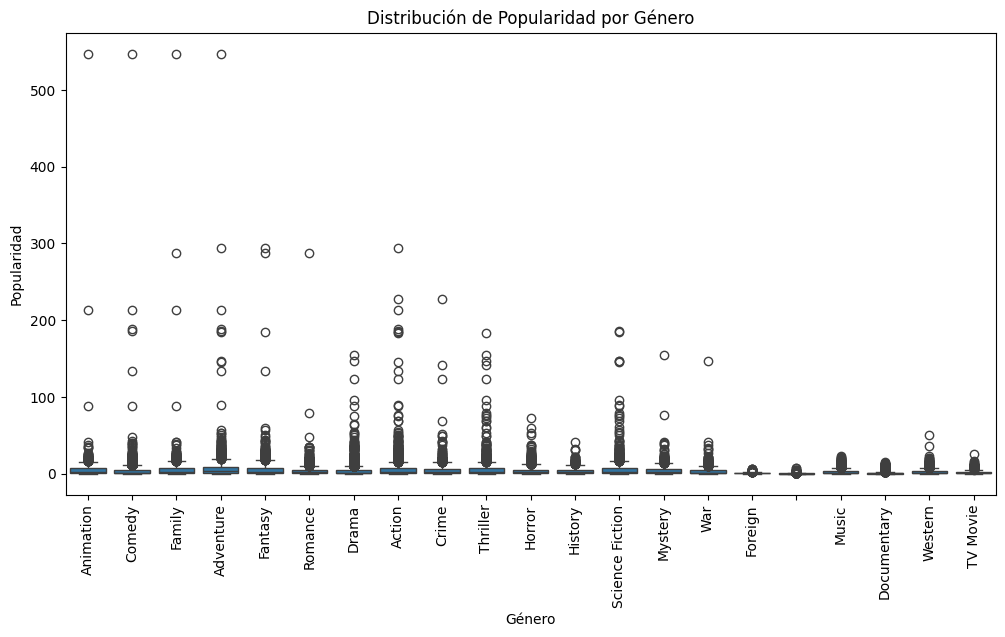

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Explode: Convertir cada género en una fila separada
movies_exploded = movies.assign(genre=movies['genres_str'].str.split(', ')).explode('genre')

# Scatter plot de Popularidad vs Género
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies_exploded, x='genre', y='popularity')
plt.xticks(rotation=90)
plt.xlabel("Género")
plt.ylabel("Popularidad")
plt.title("Distribución de Popularidad por Género")
plt.show()



In [10]:
import pandas as pd
import ast

# Cargar el CSV
movies = pd.read_csv('data/movies_dataset.csv', encoding='latin1')
dias_espanol = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['dia_semana'] = movies['release_date'].dt.day_name()
print(movies['dia_semana'])

0          Monday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
45290      Monday
45291    Thursday
45292      Friday
45293      Sunday
45294      Friday
Name: dia_semana, Length: 45295, dtype: object


In [11]:
print(movies['title'])

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45290                     Robin Hood
45291            Century of Birthing
45292                       Betrayal
45293               Satan Triumphant
45294                       Queerama
Name: title, Length: 45295, dtype: object


In [12]:
import pandas as pd
import ast 
data_movie = pd.read_csv('data/movies_dataset.csv',encoding='latin1')
# Convertir la columna 'genres' de texto a listas de diccionarios
data_movie['genres'] = data_movie['genres'].fillna('[]').apply(ast.literal_eval)

# Extraer solo los nombres de los géneros en una columna nueva
data_movie['genres_str'] = data_movie['genres'].apply(lambda x: ' '.join([d['name'] for d in x]) if isinstance(x, list) else '')

# Normalizar la popularidad (para que tenga un rango manejable)
data_movie['popularity'] = data_movie['popularity'].fillna(0)
data_movie['popularity_scaled'] = (data_movie['popularity'] - data_movie['popularity'].min()) / (data_movie['popularity'].max() - data_movie['popularity'].min())

# Crear una columna combinada con Título + Géneros + Popularidad
data_movie['content'] = data_movie['title'] + ' ' + data_movie['genres_str'] + ' ' + data_movie['popularity_scaled'].astype(str)
data_movie.to_csv('movies_dataset.csv')